In [1]:
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt

## import 2006 data

In [2]:
d2006path = r"7500 Assignment 2\\JTW2006.xlsx"
data2006 = pd.read_excel(d2006path,skiprows=1)


In [3]:
data2006["Workplace LGA"]= data2006["Workplace LGA"].str.strip()
data2006.columns = data2006.columns.str.strip()

In [4]:
a = [["Ashfield","Marrickville","Leichhardt"],["Auburn","Holroyd"],["Botany Bay","Rockdale"],["Canterbury","Bankstown"],["Gosford","Wyong"],["Hurstville","Kogarah"],["Manly","Pittwater","Warringah"]]
b = [["Inner West"],["Cumberland"],["Botany Bay"],["Canterbury-Bankstown"],["Central Coast"],["Georges River"],["Northern Beaches"]]
zip(a,b)
for x,y in zip(a,b):
    index = data2006[data2006["Workplace LGA"].isin(x)==True].index
    #print (index)
    data1 = data2006[data2006["Workplace LGA"].isin(x)].sum(axis = 0).to_frame().T
    data1["Workplace LGA"][0]=y[0]
    data2006.drop(index=index,inplace=True)
    data2006 = pd.concat([data2006,data1],ignore_index=True)

In [5]:
a = [["Ashfield","Marrickville","Leichhardt"],["Auburn","Holroyd"],["Botany Bay","Rockdale"],["Canterbury","Bankstown"],["Gosford","Wyong"],["Hurstville","Kogarah"],["Manly","Pittwater","Warringah"]]
b = [["Inner West"] ,["Cumberland"],["Botany Bay2"],["Canterbury-Bankstown"],["Central Coast"],["Georges River"],["Northern Beaches"]]
zip(a,b)

for x,y in zip(a,b):
    data2006[y[0]] = data2006.loc[:,x].sum(axis = 1)
    data2006.drop(columns = x,inplace =True)

## import geographical data

In [6]:
tpath = r'7500 Assignment 2\\export (2).geojson.tmp.tmp'
Sydney_geod = gp.GeoDataFrame.from_file(tpath,encoding = 'gb18030')

## plot counts of workers 2006

In [7]:
data2006.set_index("Workplace LGA",inplace = True)
data_merge2006 = pd.merge(Sydney_geod[["short_name","geometry"]], data2006[["GMA total"]],how = "left", left_on = "short_name", right_index = True).dropna()

In [8]:
data_merge2006["GMA total"] = data_merge2006["GMA total"].astype("int")

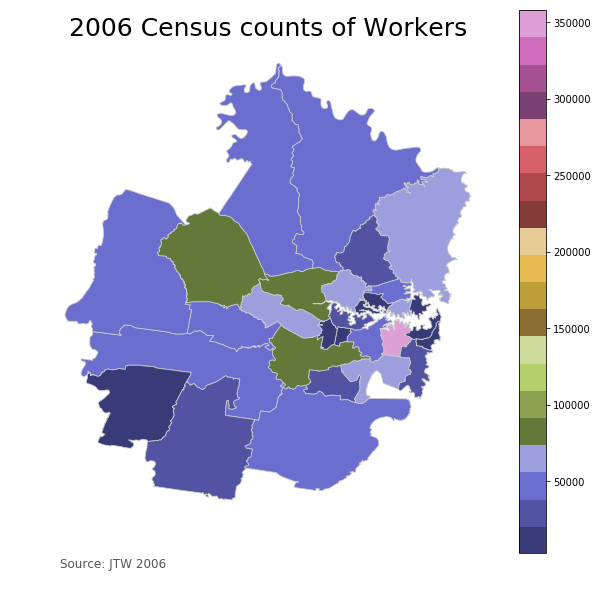

In [9]:
vmin, vmax =2658,358055
fig2006 = data_merge2006.plot(column="GMA total", cmap='tab20b', figsize=(10,10), linewidth=0.8, edgecolor='0.8',vmin = vmin, vmax = vmax,
                              legend = True, norm=plt.Normalize(vmin=vmin, vmax=vmax))

fig2006.axis("off")
plt.title("2006 Census counts of Workers", fontdict={"fontsize": "25", "fontweight" : "3"})
plt.annotate("Source: JTW 2006",xy=(0.1, .08),  xycoords="figure fraction", horizontalalignment="left", 
             verticalalignment="top", fontsize=12, color="#555555")

plt.savefig(r"7500 Assignment 2\\2006 Census counts of Workers.png")

## import 1991 data

In [10]:
d1991path = r"7500 Assignment 2\\W_HOME1991.XLS"
data1991 = pd.read_excel(d1991path,sheet_name = "HOME (No)",skiprows=2)


In [11]:
data1991["WORKPLACE SLA"]= data1991["WORKPLACE SLA"].str.strip()
data1991.columns = data1991.columns.str.strip()

In [12]:
a = [["Concord","Drummoyne"],["South Sydney","Sydney (Inner)","Sydney (Remainder)"],["Ashfield","Marrickville","Leichhardt"],["Auburn","Holroyd"],["Botany","Rockdale"],["Canterbury","Bankstown"],["Gosford","Wyong"],["Hurstville","Kogarah"],["Manly","Warringah"]]
b = [["Canada Bay"],["Sydney"],["Inner West"] ,["Cumberland"],["Botany Bay"],["Canterbury-Bankstown"],["Central Coast"],["Georges River"],["Northern Beaches"]]
zip(a,b)

for x,y in zip(a,b):
    index = data1991[data1991["WORKPLACE SLA"].isin(x)==True].index
    print (index)
    data2 = data1991[data1991["WORKPLACE SLA"].isin(x)].sum(axis = 0).to_frame().T
    
    data2["WORKPLACE SLA"][0]=y[0]
    data1991.drop(index=index,inplace=True)
    data1991 = pd.concat([data1991,data2],ignore_index=True)
    
for x,y in zip(a,b):
    data1991[y[0]] = data1991.loc[:,x].sum(axis = 1)
    data1991.drop(columns = x,inplace =True)

Int64Index([22, 23], dtype='int64')
Int64Index([3, 4, 5], dtype='int64')
Int64Index([1, 2, 17], dtype='int64')
Int64Index([17, 18], dtype='int64')
Int64Index([0, 6], dtype='int64')
Int64Index([6, 7], dtype='int64')
Int64Index([29, 30], dtype='int64')
Int64Index([3, 4], dtype='int64')
Int64Index([25, 26], dtype='int64')


## plot counts of workers 1991

In [13]:
data1991.set_index("WORKPLACE SLA",inplace = True)
data_merge1991 = pd.merge(Sydney_geod[["short_name","geometry"]], data1991[["SYDNEY SD TOTAL"]],how = "left", left_on = "short_name", right_index = True).dropna()

In [14]:
data_merge1991["SYDNEY SD TOTAL"] = data_merge1991["SYDNEY SD TOTAL"].astype("int")

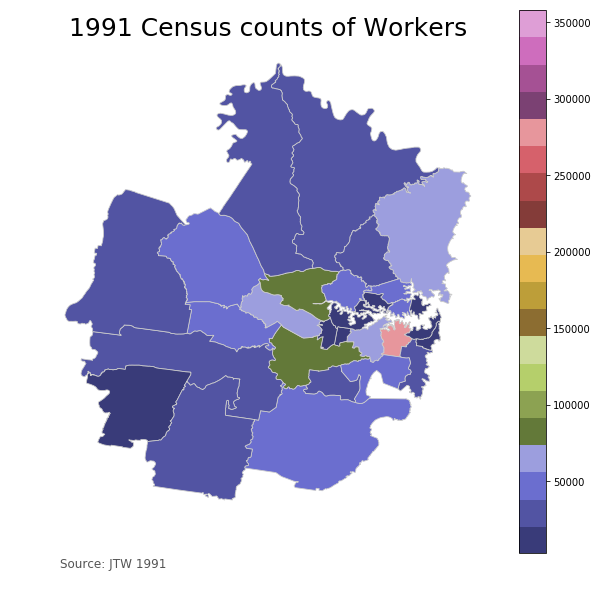

In [15]:
vmin, vmax =2658,358055

fig1 = data_merge1991.plot(column="SYDNEY SD TOTAL", cmap='tab20b', figsize=(10,10), linewidth=0.8, edgecolor='0.8',vmin=vmin,vmax=vmax,
                    norm=plt.Normalize(vmin=vmin, vmax=vmax),legend=True)
fig1.axis("off")
plt.title("1991 Census counts of Workers", fontdict={"fontsize": "25", "fontweight" : "3"})
plt.annotate("Source: JTW 1991",xy=(0.1, .08),  xycoords="figure fraction", horizontalalignment="left", 
             verticalalignment="top", fontsize=12, color="#555555")
plt.savefig(r"7500 Assignment 2\\1991 Census counts of Workers.png")

## caculate 2006 job-housing ratio and plot on the map

In [16]:
data2006.drop(index = ["No Fixed Address","Sydney Undefined","Unknown","GMA Total","NSW Undefined"], 
              columns=['Outside GMA', 'Unknown', 'GMA total'],inplace = True)

In [17]:
data2006["2006ratio"] = data2006.sum(axis = 1).values/(data2006.sum(axis = 0)).values

In [18]:
data_merge2006 = pd.merge(data_merge2006,data2006[["2006ratio"]],how = 'left',left_on="short_name",right_index = True)

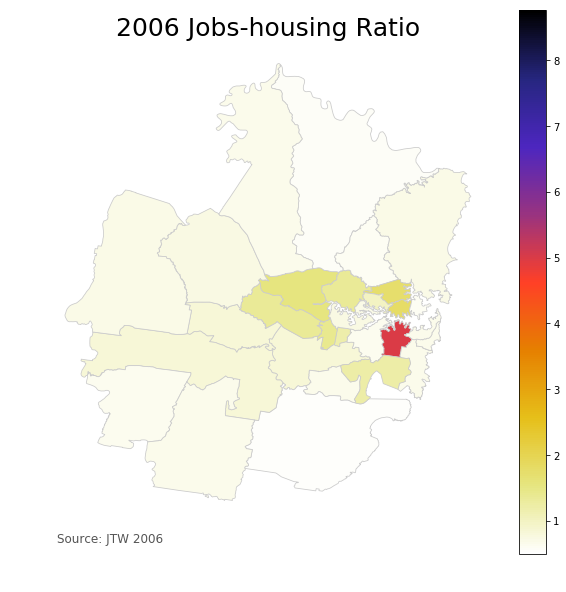

In [19]:
vmin, vmax = 0.50,8.76

fig2006 = data_merge2006.plot(figsize=(10,10),column ="2006ratio" ,cmap='CMRmap_r',legend = True, vmin=vmin,vmax=vmax, 
                              norm=plt.Normalize(vmin=vmin, vmax=vmax),linewidth=0.8, edgecolor='0.8')

fig2006.axis("off")
plt.title("2006 Jobs-housing Ratio",fontdict = {"fontsize":"25","fontweight":"5"})
plt.annotate("Source: JTW 2006",xy=(0.1, 0.1),  xycoords="figure fraction", horizontalalignment="left", 
             verticalalignment="top", fontsize=12, color="#555555")


plt.savefig(r"7500 Assignment 2\\2006 ratio0430.png")

## caculate 1991 job-housing ratio and plot on the map

In [20]:
data1991["1991ratio"] = data1991["SYDNEY SD TOTAL"].astype("int").values/data1991.loc["SYDNEY SD TOTAL"].astype("int").values

In [21]:
data_merge1991 = pd.merge(data_merge1991,data1991[["1991ratio"]], how = 'left',left_on="short_name",right_index = True)

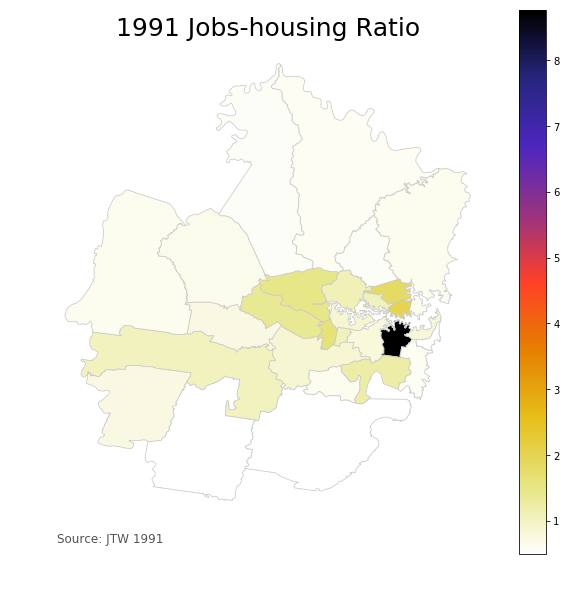

In [22]:
vmin, vmax = 0.50,8.76

fig1991 = data_merge1991.plot(figsize=(10,10),column ="1991ratio" ,cmap='CMRmap_r',legend = True,vmin=vmin,vmax=vmax, 
                              norm=plt.Normalize(vmin=vmin, vmax=vmax),
                   linewidth=0.8, edgecolor='0.8')
fig1991.axis("off")
plt.title("1991 Jobs-housing Ratio",fontdict = {"fontsize":"25","fontweight":"5"})
plt.annotate("Source: JTW 1991",xy=(0.1,0.1),  xycoords="figure fraction", horizontalalignment="left", 
             verticalalignment="top", fontsize=12, color="#555555")
plt.savefig(r"7500 Assignment 2\\1991 ratio.png")

## calculate the change of ratio of two years and save csv file

In [24]:
ratio_change = pd.merge(data_merge1991[["short_name","1991ratio"]],data2006[["2006ratio"]],how = 'left',
                        left_on = "short_name",right_index = True)
ratio_change["ratio_change"] = ratio_change["2006ratio"] - ratio_change["1991ratio"]
rc = ratio_change.sort_values("ratio_change" ,ascending=False).set_index("short_name")
rc.to_csv(r"7500 Assignment 2\\ratiochange.csv")

In [25]:
rc

,1991ratio,2006ratio,ratio_change
short_name,,,
Ryde,1.083351,1.359569,0.276218
Campbelltown,0.519103,0.679815,0.160712
Waverley,0.530121,0.680407,0.150286
Burwood,1.075693,1.185424,0.109732
The Hills,0.571163,0.678987,0.107824
Fairfield,0.743274,0.829549,0.086275
Hunters Hill,0.618283,0.698410,0.080126
Blacktown,0.665652,0.744799,0.079147
Penrith,0.634558,0.702941,0.068383
